In [12]:
import librosa
import numpy as np
#from sporco import util
#from sporco import plot
from sporco.admm import cbpdn
import sporco.metric as sm
import pickle 

D = []
charset = ['A','Bb','B','C','Db','D','Eb','E','F','Gb','G','Ab']
octave = 0

sr = 11025
for i in range(88):
    currIndex = i % 12
    c = charset[currIndex]
    #print(c+str(octave))
    D.append(librosa.load("downsample/Piano.ff." + c + str(octave) + ".aiff",sr=11025)[0])
    if currIndex == 2:
        octave += 1

D = np.asarray(D)

lmbda = 0.005
# 1 temporal dimension
dimN = 1

opt = cbpdn.ConvBPDN.Options({'Verbose' : True, 'MaxMainIter' : 200,
                    'HighMemSolve' : True, 'LinSolveCheck' : True,
                    'RelStopTol' : 1e-3, 'AuxVarObj' : False})

song, sr = librosa.load("downsample/song.aiff",sr=sr)
D = np.rot90(D)
b = cbpdn.ConvBPDN(D, song, lmbda, opt,dimN=dimN)
X = b.solve()
X = X[:,0,0,:]
with open('result.pkl', 'wb') as fid:
    pickle.dump(X, fid)



Itn   Fnc       DFid      Regℓ1     r         s         ρ         
----------------------------------------------------------------
   0  7.21e+00  5.78e+00  2.86e+02  9.99e-01  7.47e-03  1.25e+00
   1  9.64e+00  8.29e+00  2.71e+02  9.60e-01  8.73e-02  1.25e+00
   2  2.32e+00  1.07e+00  2.49e+02  7.68e-01  3.09e-01  4.10e+00
   3  1.43e+00  3.98e-01  2.06e+02  3.66e-01  3.63e-01  6.39e+00
   4  1.28e+00  2.68e-01  2.02e+02  2.62e-01  3.03e-01  6.39e+00
   5  1.21e+00  2.32e-01  1.95e+02  2.18e-01  2.47e-01  6.39e+00
   6  1.12e+00  2.49e-01  1.73e+02  1.85e-01  2.15e-01  6.39e+00
   7  1.21e+00  3.81e-01  1.66e+02  1.59e-01  1.67e-01  6.39e+00
   8  1.08e+00  3.05e-01  1.56e+02  1.34e-01  1.42e-01  6.39e+00
   9  9.98e-01  2.73e-01  1.45e+02  1.13e-01  1.29e-01  6.39e+00
  10  9.58e-01  2.60e-01  1.40e+02  9.86e-02  1.11e-01  6.39e+00
  11  9.29e-01  2.58e-01  1.34e+02  8.71e-02  9.76e-02  6.39e+00
  12  8.42e-01  2.01e-01  1.28e+02  7.71e-02  8.96e-02  6.39e+00
  13  8.47e-01  2.23e-0

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
with open('result.pkl', 'rb') as Y:
    Y = pickle.load(Y)

from scipy.signal import argrelextrema
result = Y
print(result.shape)
local_maxs = []
i = 0

#for row in result:
#    #print(row)
#    i +=1
#    argrelextrema(row, np.greater)
    




(77175, 88)


0.0


88


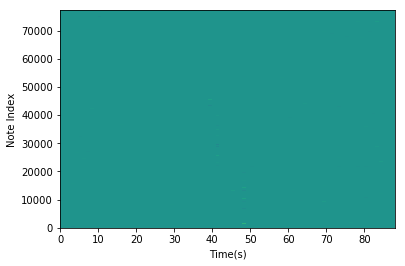

In [60]:

m = np.amax(Y)
Z = np.fliplr(Y/m)
Nf,Nt=np.shape(Z)
print(Nt)
times = np.arange(Nt)/11025
notes = np.arange(1,89)
notes_matrix,times_matrix=np.meshgrid(notes,times)
plt.pcolormesh(Z)
plt.xlabel('Time(s)')
plt.ylabel('Note Index')

In [64]:
import librosa
import numpy as np
#from sporco import util
#from sporco import plot
from sporco.admm import cbpdn
import sporco.metric as sm
import pickle 
import os

D = []
index = 1

sr = 11025
directory = "samples/Piano_01_Grand Steinway & Sons/"
for fname in os.listdir(directory):
    D.append(librosa.load(directory + fname,sr=11025,duration=1.0)[0])

    
D = np.asarray(D)
D = np.rot90(D)
with open('k1dict.pkl','wb') as fid:
    pickle.dump(D,fid);




In [65]:
import scipy.io.wavfile

def wavwrite(filepath, data, sr, norm=True, dtype='int16',):
    if norm:
        data /= np.max(np.abs(data))
    data = data * np.iinfo(dtype).max
    data = data.astype(dtype)
    scipy.io.wavfile.write(filepath, sr, data)




C,sr = librosa.load(directory + 'K0149.wav', sr=11025, duration=1.0)
G,sr = librosa.load(directory + 'K0156.wav', sr=11025, duration = 1.0)
A,sr = librosa.load(directory + 'K0158.wav', sr=11025, duration = 1.0)

song = np.concatenate((C,C,G,G,A,A,G))
wavwrite('song.wav', song, sr)

In [68]:
with open('k1dict.pkl','rb') as fid:
    D = pickle.load(fid)
print(D.shape)
lmbda = 0.005
# 1 temporal dimension
dimN = 1

opt = cbpdn.ConvBPDN.Options({'Verbose' : True, 'MaxMainIter' : 200,
                    'HighMemSolve' : True, 'LinSolveCheck' : True,
                    'RelStopTol' : 1e-3, 'AuxVarObj' : False})

song, sr = librosa.load("song.wav",sr=sr)

b = cbpdn.ConvBPDN(D, song, lmbda, opt,dimN=dimN)
X = b.solve()
X = X[:,0,0,:]
with open('k1results.pkl', 'wb') as fid:
    pickle.dump(X, fid)

(11025, 88)
Itn   Fnc       DFid      Regℓ1     r         s         ρ         
----------------------------------------------------------------
   0  1.64e+01  1.48e+01  3.05e+02  1.00e+00  0.00e+00  1.25e+00
   1  2.38e+01  2.23e+01  3.01e+02  9.87e-01  3.89e-02  1.25e+00
   2  1.85e+00  4.01e-01  2.89e+02  8.33e-01  3.25e-01  6.23e+00
   3  1.33e+00  2.44e-01  2.17e+02  3.79e-01  4.63e-01  9.86e+00
   4  1.65e+00  4.17e-01  2.46e+02  2.73e-01  3.70e-01  8.83e+00
   5  2.05e+00  8.56e-01  2.39e+02  2.48e-01  2.67e-01  7.50e+00
   6  1.44e+00  4.82e-01  1.92e+02  2.11e-01  2.28e-01  7.50e+00
   7  1.20e+00  3.40e-01  1.73e+02  1.85e-01  1.62e-01  7.50e+00
   8  1.19e+00  3.77e-01  1.63e+02  1.50e-01  1.34e-01  7.50e+00
   9  1.25e+00  4.75e-01  1.55e+02  1.21e-01  1.28e-01  7.50e+00
  10  1.29e+00  5.10e-01  1.56e+02  1.04e-01  1.11e-01  7.50e+00
  11  1.18e+00  4.26e-01  1.50e+02  9.18e-02  1.00e-01  7.50e+00
  12  1.22e+00  5.12e-01  1.41e+02  8.19e-02  9.27e-02  7.50e+00
  13  1.21e

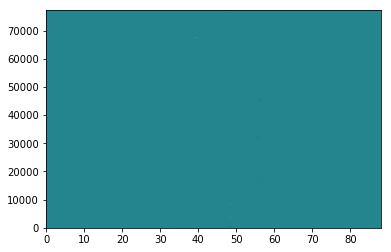

In [69]:
with open('k1results.pkl','rb') as Y:
    Y = pickle.load(Y)
    
plt.pcolormesh(Y)

In [102]:
with open('k1results.pkl','rb') as Y:
    Y = pickle.load(Y)
from scipy.signal import argrelextrema
# Y is a 70k by 88 array
# get each sub 50 row of Y (1543 total)
start = 0
end = 551

localmax = []
for i in range(1543):
    row = Y[start:end,:]
    #print(row.shape)
    sumrow = np.sum(row,axis=0)
    #print(argrelextrema(sumrow,np.greater))
    #print('\n')
    start = end
    end += 551

m = np.amax(Y)
Z = Y/m
lowvals = Z < 0.2
Z[lowvals] = 0
start = 0
end = 551
window = 0
for i in range(1543):
    row = Z[start:end,:]
    #print(row.shape)
    sumrow = np.sum(row,axis=0)
    relex = argrelextrema(sumrow,np.greater)[0]
    if(len(relex) != 0):
        print(relex, window)
        print('\n')
    start = end
    end += 551
    window+=1

[48] 1


[48] 2


[48 55 58 67] 22


[55] 23


[55 75] 42


[55 57 59] 62


[57] 81


[55 57] 82


[57] 101


[55 57 75] 102


[55] 103


[55] 113


[45 48] 122


[47] 123


